# Simple Linear Regration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
df.shape # 200 rows of Data with 2 column i.e cgpa & package

(200, 2)

#### Visualising the Dataset

Text(0.5, 1.0, 'CGPA Vs Package')

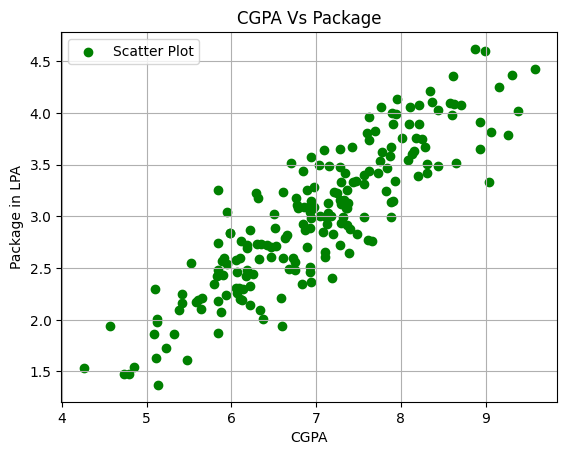

In [4]:
# Plotting the graph
plt.scatter(df['cgpa'],df['package'],color='green',marker='o',label='Scatter Plot')
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')
plt.legend()
plt.grid(True)
plt.title('CGPA Vs Package')



### Steps To Traing Model

##### 1. Spliting the Input & Output Column for Traing

In [5]:
x = df.iloc[:,0:1]  # Prefered
y = df.iloc[:,-1]
# if Doing  
# x = df['cgpa']  
# y = df['package']

##### 2. Further Slipting for **Training** and **Testing**

In [6]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

##### 3. Train Model

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### Visualising Best Fit Line

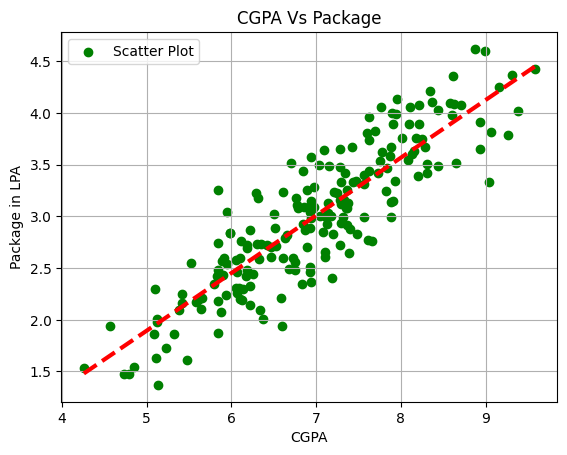

In [8]:
plt.scatter(df['cgpa'], df['package'], color='green', marker='o', label='Scatter Plot')
plt.xlabel('CGPA')
plt.ylabel('Package in LPA')
plt.legend()
plt.grid(True)
plt.title('CGPA Vs Package')

# Sort values for a smooth line
x_vals = x_train.sort_values(by='cgpa')
y_pred = lr.predict(x_vals)

plt.plot(x_vals, y_pred, color='red', linestyle='--', linewidth=3)

##### Testing

In [9]:
lr.predict(x_test.iloc[1].values.reshape(1,1))

d:\This_User\Python 3.10 setup\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

In [10]:
y_test.iloc[0]

4.1

##### slope and intercept

In [11]:
m = lr.coef_
b = lr.intercept_
print(f"Slope(m) = {m}\nY-intercept(b) = {b}")

Slope(m) = [0.55795197]
Y-intercept(b) = -0.8961119222429144


## Performing Regration Metrics

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [16]:
# Y`i --> Prediced Values
y_predict = lr.predict(x_test)
y_predict

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [ ]:
# Yi --> actual value
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [18]:
print(f"Mean Absolute Error (MAE) : {mean_absolute_error(y_test,y_predict)}")
print(f"Mean Squared Error (MSE) : {mean_squared_error(y_test,y_predict)}")
print(f"Root Mean Squared Error (RMSE) : {root_mean_squared_error(y_test,y_predict)}")
print(f"R2 Score (R2) : {r2_score(y_test,y_predict)}")
r2 =r2_score(y_test,y_predict)

Mean Absolute Error (MAE) : 0.2884710931878175
Mean Squared Error (MSE) : 0.12129235313495527
Root Mean Squared Error (RMSE) : 0.34827051717731616
R2 Score (R2) : 0.780730147510384


In [19]:
x_test.shape

(40, 1)

In [20]:
# Adjusted R2
AR2 = 1 - (((1-r2)*((x_test.shape[0])-1))/((x_test.shape[0])-1-1))
print(f"Adjusted R2 Score (A-R2) : {AR2}")


Adjusted R2 Score (A-R2) : 0.7749598882343415
